<a href="https://colab.research.google.com/github/Hollydugan/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
import pandas as pd
import numpy as np
from scipy.stats import t, ttest_1samp





In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-12-11 16:40:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-12-11 16:40:12 (127 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [4]:
df=pd.read_csv('house-votes-84.data', 
               header=None, 
               names=['party', 'handicapped-infants', 'water-project', 'budget',
                      'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
                      'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 
                      'immigration', 'synfuels', 'education', 'right-to-sue', 'crime', 
                      'duty-free', 'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [6]:
df=df.replace({'?':np.NaN, 'n':0, 'y':1})


df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [13]:
df.mean()

handicapped-infants     0.442080
water-project           0.503876
budget                  0.596698
physician-fee-freeze    0.417453
el-salvador-aid         0.504762
religious-groups        0.641509
anti-satellite-ban      0.567696
aid-to-contras          0.576190
mx-missile              0.501211
immigration             0.504673
synfuels                0.362319
education               0.423267
right-to-sue            0.509756
crime                   0.593301
duty-free               0.427518
south-africa            0.812689
dtype: float64

In [0]:
# Confidence Interval



from scipy import stats

data=df['crime']

confidence=0.95

def confidence_interval(data, confidence=0.95):
   data=np.array(data)
   mean=np.mean(data)
   n=len(data)
   stderr=(np.std(data, ddof=1) / np.sqrt(n))
   t=stats.t.ppf((1 + confidence) / 2.0, n-1)
   moe=stderr*t
   return(mean, mean-moe, mean+moe)

   


In [17]:
confidence_interval(data)

(nan, nan, nan)

ValueError: ignored

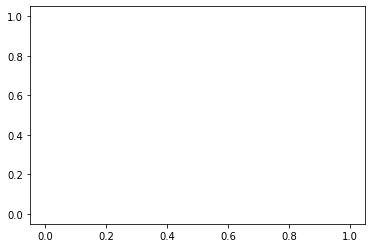

In [0]:
#graphical Representation

import seaborn as sns

sns.distplot(data)
CI=confidence_interval(data)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k')




In [0]:
# Currently, it is telling me that there are a whole lot of NaNs

In [18]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

--2019-12-11 20:43:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data’

car.data            100%[===================>]  50.65K   177KB/s    in 0.3s    

2019-12-11 20:43:26 (177 KB/s) - ‘car.data’ saved [51867/51867]



In [21]:
car_data=pd.read_csv('car.data', header=None, names=['buying', 'maint', 'doors', 'persons', 
                                            'lug-boot', 'safety'])
car_data

,buying,maint,doors,persons,lug-boot,safety
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...
low,low,5more,more,med,med,good
low,low,5more,more,med,high,vgood
low,low,5more,more,big,low,unacc
low,low,5more,more,big,med,good


In [22]:
car_data['buying'].value_counts()

high     432
vhigh    432
low      432
med      432
Name: buying, dtype: int64

In [23]:
car_data['doors'].value_counts()

more    576
2       576
4       576
Name: doors, dtype: int64

In [37]:
contingency_table=pd.crosstab(car_data['buying'], car_data['doors'], margins=True)

contingency_table

doors,2,4,more,All
buying,,,,
high,144,144,144,432
low,144,144,144,432
med,144,144,144,432
vhigh,144,144,144,432
All,576,576,576,1728


In [25]:
observed=pd.crosstab(car_data['buying'], car_data['doors'])

observed

doors,2,4,more
buying,,,
high,144,144,144
low,144,144,144
med,144,144,144
vhigh,144,144,144


In [30]:
highcount=crosstab.iloc[0][0:3].values

highcount

array([144, 144, 144])

In [32]:
lowcount=crosstab.iloc[1][0:3].values

lowcount

array([144, 144, 144])

In [44]:
row_sums=contingency_table.iloc[0:2, 3].values
col_sums=contingency_table.iloc[2, 0:3].values

print(row_sums)
print(col_sums)
total=contingency_table.loc['All', 'All']




[432 432]
[144 144 144]


In [52]:
exepected= []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val=column*row_sums[1]/total
    expected_row.append(expected_val)
expected.append(expected)

expected= np.array(expected)

print(expected.shape)
print(expected)

NameError: ignored

In [53]:
chi_squared=((observed-expected)**2/(expected).sum())
print(f'chi_squared: {chi_squared}')
dof=(len(row_sums)-1) *(len(col_sums)-1)
print(f"degreesoffreedom: (dof)")

NameError: ignored

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)